## Transformers Self-Attention Mechanism (Visualization)

Introduced in 2017 by researchers from Google and the University of Toronto in their seminal paper [Attention is All You Need](https://proceedings.neurips.cc/paper/2017/hash/3f5ee243547dee91fbd053c1c4a845aa-Abstract.html), the Transformer has become a cornerstone of modern Natural Language Processing (NLP). This innovative encoder-decoder architecture was aimed at reducing sequencial computation (to speed-up training time). And has found wide application in tasks such as machine translation, reading comprehension, abstractive summarization, and text classification.

The core contribution of the Transformer is the use of a self-attention mechanism (while replacing RNNs). This allows the model to learn the relevance and context of all words (tokens) in an input, regardless of their position. It achieves this through attention weights (learned during the training phase) that determine the importance of each word to one another (irrespectively of their position).

In essence, the attention mechanism transforms a set of vectors from an initial dimensional space into a more nuanced representation better suited for downstream tasks. For language processing, this initial space might be word embeddings capturing basic semantic properties. The attention mechanism then enriches this representation, leading to improved accuracy, computational efficiency, and a clearer understanding of information flow compared to traditional Recurrent Neural Networks (RNNs) and Convolutional Neural Networks (CNNs), which process input sequentially and do not have a way to explicitly consider the relationships between words.

The concept of attention in NLP isn't entirely new. It was first introduced to enhance sequence-to-sequence models in the 2014 paper [Neural Machine Translation by Jointly Learning to Align and Translate](https://arxiv.org/abs/1409.0473) by Bahdanau, Cho, and Bengio. Their work allowed models "*to automatically (soft-)search for parts of a source sentence that are relevant to predicting a target word*". However, the Transformer took this concept further, replacing RNNs entirely with attention mechanisms and introducing multi-head attention. This enables the model to focus on various types of relationships simultaneously, marking a significant leap forward in NLP capabilities.

In this notebook we will explore this mechanism using [bertviz](https://pypi.org/project/bertviz/), an interactive tool for visualizing attention in Transformer models.

<p align="center">
  <img src="./static/self_attention_transformer_architecture.png" width="400">
</p>

<p align="center">The Transformer Architecture (source: https://arxiv.org/pdf/1706.03762.pdf)</p>

> Attention was first introduced as a way to improve sequence-to-sequence models. In particular, a commonplace RNN-based encoder-decoder translation architecture "*for allowing a model to automatically (soft-)search for parts of a source sentence that are relevant to predicting a target word*", as outlined in the paper [Neural Machine Translation by jointly Learning to Align and Translate, 2004](https://arxiv.org/abs/1409.0473) by Bahdanau, Cho, and Bengio.

In [1]:
%pip install bertviz transformers --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import head_view, model_view
from bertviz.neuron_view import show
from bertviz.transformers_neuron_view import BertModel

utils.logging.set_verbosity_error()  # Suppress standard warnings

### Understanding Self-Attention

As outlined above, the intuition behind self-attention is that **averaging token embeddings, instead of using a fixed embedding for each token, enables the model to capture how words relate to each other in the input**. In practice, said weighted relationships represent the syntactic and contextual structure of the sentence, leading to a more nuanced and rich understanding of the data.

We will use the `BERT-base-uncase` model to explore said attention mechanism at head and layer levels with two sentences.

In [3]:
model_type = 'bert'
model_version = 'bert-base-uncased'

In [4]:
sentence_a = "leaves fall in autumn"
sentence_b = "autumn is marked by colorful foliage"

When tokenizing these sentences we can observe the special tokens [CLS] and [SEP], which help the model understand the structure of the input: 
- The [CLS] token is at the beginning, indicating the start of the sequence.
- The first [SEP] token separates two sentences: "leaves fall in autumn" and "autumn is marked by colorful foliage".
- The second [SEP] token marks the end of the entire input sequence.

In [5]:
model = AutoModel.from_pretrained(model_version, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_version)

/usr/local/python/3.10.13/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
inputs = tokenizer(sentence_a, sentence_b, return_tensors='pt')
tokens = tokenizer.convert_ids_to_tokens(inputs.input_ids[0])
tokens

['[CLS]',
 'leaves',
 'fall',
 'in',
 'autumn',
 '[SEP]',
 'autumn',
 'is',
 'marked',
 'by',
 'colorful',
 'foliage',
 '[SEP]']

In [7]:
attention = model(**inputs).attentions
len(attention), attention[0].shape

(12, torch.Size([1, 12, 13, 13]))

### Multi-heads

BERT actually learns multiple attention mechanisms, called heads, which operate in parallel to one another. Because the attention heads do not share parameters, each head learns a unique attention pattern. The version of BERT that we consider here — BERT Base — has 12 layers and 12 heads, resulting in a total of 12 x 12 = 144 distinct attention mechanisms (heads). We can visualize attention in all of the heads at once, using `model view`.

In [8]:
sentence_b_start = inputs['token_type_ids'][0].tolist().index(1)
model_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

#### Some Patterns that can be typically observed:

- Syntactic relationships: e.g. subject-verb or noun-adjective relationships, which helps the model understand the grammatical structure of sentences.
- Semantic relationships: understand the meaning and associations between different terms.
- Coreference resolution: learn to associate pronouns with their corresponding antecedents, allowing it to correctly interpret sentences with references to previously mentioned entities.
- Word order and sentence structure: allowing the model to capture the order and hierarchy of phrases and clauses.
- Long-range dependencies: capture dependencies between distant words in a sentence.
- Contextual nuances: such as sarcasm, irony, or sentiment, by attending to specific words or phrases that carry such meaning.

**Attention to the Next Word:**

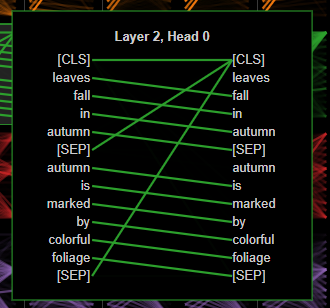

**Attention to Previous Word:**

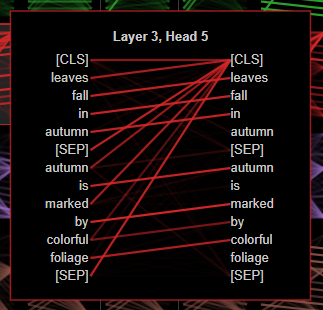

**Attention to Identical/Related Words:**

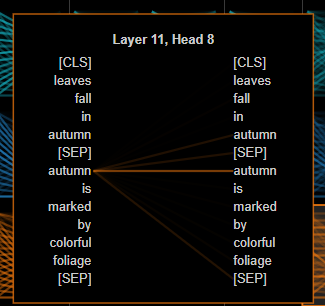

**Attention Noun-Noun:**



**Attention Subject-Verb:**



**Attention to End of Sentence(s):**

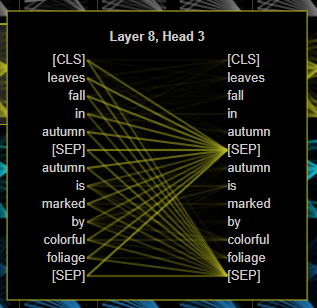

### Head View

This shows how attention flows between tokens:

![Self Attention Head View](./static/self_attention_head_view.png)

In [9]:
head_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

### Neuron View

We can visualize how attention weights are computed from query and key vectors using the neuron view.

Query q: the query vector q encodes the word on the left that is paying attention, i.e. the one that is “querying” the other words.

Key k: the key vector k encodes the word on the right to which attention is being paid. The key vector and the query vector together determine a compatibility score between the two words.

q×k (elementwise): the elementwise product between the query vector of the selected word and each of the key vectors. This is a precursor to the dot product (the sum of the elementwise product) and is included for visualization purposes because it shows how individual elements in the query and key vectors contribute to the dot product.

q·k: the scaled dot product (see above) of the selected query vector and each of the key vectors. This is the unnormalized attention score.

Softmax: the softmax of the scaled dot product. This normalizes the attention scores to be positive and sum to one.

![Self Attention Neuron View](./static/self_attention_neuron_view.png)

In [10]:
text = "astronomers discovered a new planet"

In [11]:
model = BertModel.from_pretrained(model_version) # supports only BERT, GPT-2, and RoBERTa
show(model, model_type, tokenizer, text, display_mode="light", layer=0, head=8)

 80%|███████▉  | 351734784/440473133 [00:15<00:03, 28599261.83B/s]

100%|██████████| 440473133/440473133 [00:19<00:00, 22098829.90B/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>